In [1]:
import numpy as np 
import pandas as pd

In [2]:
train = pd.read_csv('AdyTrain.csv', encoding='utf-8')
train

,ID,Comment,feedback
0,4,"Đặt 5 món ăn cho gia đình, giao 2 chén sup ăn ...",0
1,5,"Đặt 2 phần gà 2 phần cơm thêm, giao thiếu 1 ph...",0
2,7,"Mình với em gái mới ăn ở đây, thái độ nhân viê...",0
3,102,Đặt đơn xác nhận được hơn 35 phút tài xế mới r...,0
4,113,MÌnh đã ủng hộ quán dc 6 năm nhưng lần đầu tiê...,0
...,...,...,...
516,567,"Quá tuyệt vời!! Đồ ăn ngon, vừa miệng, giá cả ...",1
517,568,"Đến ngày cuối tuần đông lắm, đợi 30p mới có bà...",1
518,575,"Đồ ăn ngon, nhân viên thân thiện. Chắc chắ...",1
519,577,"Không phải bàn về chất lượng của 4ps rồi ha, m...",1


In [3]:
test=pd.read_csv('dataAdyTest.csv', encoding='utf-8')
test

,ID,Comment
0,1,"Nên nêu rõ các thành phần có trong thức ăn, Tr..."
1,6,Nay mình đi gọi 2 món. Món đầu tiên có gà và t...
2,9,ĐÓNG GÓI RẤT TỆ. ĐẶT 3 CANH NÓNG HỔI MÀ NGHĨ S...
3,12,Đi hoài ở đây nên ít khi chụp ảnh lại. Đồ ăn n...
4,15,"Ngon, giao hàng đầy đủ"
...,...,...
98,353,"Bản thân mình ko thx ăn Pizza, hiếm khi nào ăn..."
99,357,"- Vỏ bánh mỏng, ăn không bị ngán, hương vị phả..."
100,361,Mình thèm Pizza nhưng chỉ hợp vị của 4P's thôi...
101,365,Instagram - @catherine.loves.foods\n\nTới với ...


In [4]:
train.isnull().sum()

ID          0
Comment     0
feedback    0
dtype: int64

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        521 non-null    int64 
 1   Comment   521 non-null    object
 2   feedback  521 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 12.3+ KB


In [6]:
train.describe()

,ID,feedback
count,521.000000,521.000000
mean,340.049904,0.905950
std,180.276554,0.292179
min,2.000000,0.000000
25%,188.000000,1.000000
50%,363.000000,1.000000
75%,495.000000,1.000000
max,625.000000,1.000000


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       103 non-null    int64 
 1   Comment  103 non-null    object
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import string, nltk, re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [9]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
def preprocessing(text):
    text = text.lower()
    pattern = re.compile('[^a-z]')
    words = nltk.word_tokenize(text)
    #stop_words = set(nltk.corpus.stopwords.words('english'))
    #words = [PorterStemmer().stem(word) for word in words if word.lower() not in stop_words]
    preprocessed_text = ' '.join(words)
    return preprocessed_text

In [11]:
def remove_punctuation(text):
    translator = str.maketrans('','',string.punctuation)
    return text.translate(translator)

In [12]:
def remove_stopwords(text, filename):
    with open(filename, 'r', encoding='utf-8') as f:
        words_to_remove = set(f.read().splitlines())
    words = text.split()
    cleaned_words = [word for word in words if word not in words_to_remove]
    cleaned_text = ' '.join(cleaned_words)
    return cleaned_text

In [13]:
filename = 'vietnamese-stopwords.txt'
train['Comment_cleaned']=train['Comment'].apply(preprocessing).apply(remove_punctuation).apply(remove_stopwords, args=(filename,))
test['Comment'] = test['Comment'].apply(preprocessing).apply(remove_punctuation).apply(remove_stopwords, args=(filename,))
train

,ID,Comment,feedback,Comment_cleaned
0,4,"Đặt 5 món ăn cho gia đình, giao 2 chén sup ăn ...",0,5 món gia đình giao 2 chén sup nhân viên logic...
1,5,"Đặt 2 phần gà 2 phần cơm thêm, giao thiếu 1 ph...",0,2 gà 2 cơm giao 1 gà gọi k dc
2,7,"Mình với em gái mới ăn ở đây, thái độ nhân viê...",0,gái thái độ nhân viên phục vụ tệ xe order nv d...
3,102,Đặt đơn xác nhận được hơn 35 phút tài xế mới r...,0,đơn xác 35 phút tài xế quán trễ hẹn giao shope...
4,113,MÌnh đã ủng hộ quán dc 6 năm nhưng lần đầu tiê...,0,ủng hộ quán dc 6 đầu tiên gọi món thịt nướng ớ...
...,...,...,...,...
516,567,"Quá tuyệt vời!! Đồ ăn ngon, vừa miệng, giá cả ...",1,tuyệt vời đồ ngon miệng giá hợp lý gian thoáng...
517,568,"Đến ngày cuối tuần đông lắm, đợi 30p mới có bà...",1,tuần đông lắm đợi 30p bàn chờ đồ 4p ngon đồng ...
518,575,"Đồ ăn ngon, nhân viên thân thiện. Chắc chắ...",1,đồ ngon nhân viên thân thiện chắc chắn sẽ...
519,577,"Không phải bàn về chất lượng của 4ps rồi ha, m...",1,bàn chất 4ps ha ghé t6 đầu tiên nhân viên nv p...


In [14]:
x=train['Comment_cleaned'].values
y=train['feedback'].values

In [15]:
classifier=CountVectorizer()
x=classifier.fit_transform(x)

In [16]:
# Lấy danh sách các từ vựng từ CountVectorizer
vocabulary = classifier.get_feature_names_out()

# Tính tổng số lần xuất hiện của các từ
word_counts = x.sum(axis=0)

# Tạo danh sách các từ và tần số xuất hiện tương ứng
word_freqs = [(word, count) for word, count in zip(vocabulary, word_counts.tolist()[0])]

# Sắp xếp theo tần số xuất hiện giảm dần
sorted_word_freqs = sorted(word_freqs, key=lambda x: x[1], reverse=True)

# Lấy top 10 từ vựng phổ biến nhất
top_10_words = sorted_word_freqs[:10]

# In kết quả
for word, count in top_10_words:
    print(f"{word}: {count}")


ngon: 656
pizza: 593
món: 479
vị: 301
đi: 270
quán: 269
nhân: 243
hơi: 239
viên: 237
lắm: 225


In [17]:
# Tính độ dài trung bình của các dòng dữ liệu
average_length = x.mean(axis=1)

# In độ dài trung bình của các dòng
print("Độ dài trung bình của các dòng dữ liệu:")
print(average_length)


Độ dài trung bình của các dòng dữ liệu:
[[0.00415251]
 [0.00226501]
 [0.01283503]
 [0.00641752]
 [0.00943752]
 [0.00490751]
 [0.04303511]
 [0.0392601 ]
 [0.01057003]
 [0.01019253]
 [0.01245753]
 [0.01094753]
 [0.01887505]
 [0.01434504]
 [0.02340506]
 [0.00868252]
 [0.00679502]
 [0.03133258]
 [0.01661004]
 [0.02076255]
 [0.00339751]
 [0.00226501]
 [0.02906757]
 [0.00830502]
 [0.02114005]
 [0.01736504]
 [0.01208003]
 [0.01812005]
 [0.01057003]
 [0.00415251]
 [0.00302001]
 [0.01283503]
 [0.01585504]
 [0.000755  ]
 [0.01245753]
 [0.01019253]
 [0.01245753]
 [0.00679502]
 [0.00339751]
 [0.00302001]
 [0.00264251]
 [0.02416006]
 [0.00490751]
 [0.00490751]
 [0.00604002]
 [0.00490751]
 [0.000755  ]
 [0.01057003]
 [0.05851265]
 [0.01849755]
 [0.01585504]
 [0.00755002]
 [0.00943752]
 [0.00339751]
 [0.01245753]
 [0.00151   ]
 [0.00226501]
 [0.02567006]
 [0.00528501]
 [0.02416006]
 [0.00717252]
 [0.0018875 ]
 [0.0003775 ]
 [0.00264251]
 [0.01849755]
 [0.02114005]
 [0.00943752]
 [0.02680257]
 [0.0022

In [18]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

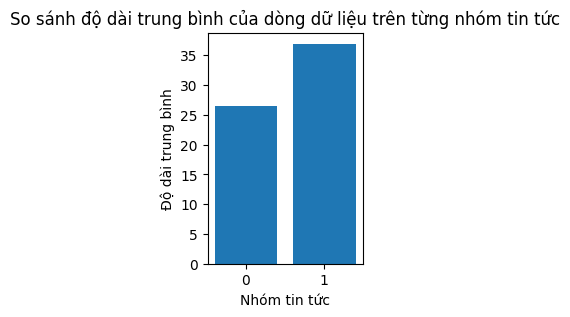

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Tạo danh sách nhãn nhóm tin tức
labels = train['feedback'].unique()

# Tính độ dài trung bình của các dòng dữ liệu theo từng nhóm
average_lengths = []
for label in labels:
    group_indices = (y == label)
    group_x = x[group_indices]
    group_average_length = np.mean([group_x[i].getnnz() for i in range(group_x.shape[0])])
    average_lengths.append(group_average_length)

# Vẽ biểu đồ so sánh độ dài trung bình của dòng dữ liệu trên từng nhóm tin tức
plt.figure(figsize=(2, 3))
plt.bar(labels, average_lengths)
plt.xlabel('Nhóm tin tức')
plt.ylabel('Độ dài trung bình')
plt.title('So sánh độ dài trung bình của dòng dữ liệu trên từng nhóm tin tức')
plt.show()


In [20]:
# Khởi tạo một đối tượng CountVectorizer
vectorizer = CountVectorizer()

# Chuyển đổi dữ liệu văn bản thành đặc trưng số
x = vectorizer.fit_transform(train['Comment_cleaned'].values)

# Hiển thị các từ vựng đã học từ dữ liệu
vocab = vectorizer.vocabulary_
print("Vocab:", list(vocab.keys()))

# Hiển thị ma trận đặc trưng số
print("Feature matrix:")
print(x.toarray())


Vocab: ['món', 'gia', 'đình', 'giao', 'chén', 'sup', 'nhân', 'viên', 'logic', 'suy', 'luận', 'gà', 'cơm', 'gọi', 'dc', 'gái', 'thái', 'độ', 'phục', 'vụ', 'tệ', 'xe', 'order', 'nv', 'dọn', 'bànđồ', 'dở', 'vị', 'hồn', 'đấm', 'mồm', 'bao', 'nữa', 'nhất', 'canh', 'kim', 'chi', 'mì', 'ramen', 'lợ', 'mặn', 'lẫn', 'cay', 'chán', 'đơn', 'xác', '35', 'phút', 'tài', 'xế', 'quán', 'trễ', 'hẹn', 'shopeefood', 'yêu', 'cầu', 'hàng', 'ủng', 'hộ', 'đầu', 'tiên', 'thịt', 'nướng', 'ớt', 'rau', 'hôi', 'mùi', 'lông', 'miếng', 'vô', 'mắc', 'ói', 'nguyên', 'dĩa', 'sợ', 'hãiiii', 'thức', 'app', 'now', 'lý', 'đá', 'tiếc', 'chuỗi', '4ps', 'chảnh', 'hách', 'dịch', 'bàn', 'trc', 'lễ', 'tuần', 'câu', 'chối', 'đậu', 'xanh', 'tất', 'nhiên', 'nhu', 'đi', 'uống', 'đông', 'golden', 'gate', 'redsun', 'chất', 'nhảm', 'nhí', 'vớ', 'vẩn', 'đào', 'thử', 'q1', 'q2', 'saigon', 'center', 'q7', 'q11', 'bình', 'thạnh', 'aeon', 'cảm', 'basta', 'hiro', 'ngon', 'hội', 'thay', 'đổi', 'thất', 'vọng', 'bố', 'láo', 'book', 'cực', 'kì'

In [21]:
print(len(vocab))

2649


In [22]:
from sklearn.linear_model import LogisticRegression

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
logreg = LogisticRegression()

# Train the model on the training data
logreg.fit(x_train, y_train)

# Make predictions on the test data
y_pred = logreg.predict(x_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8857142857142857


In [23]:
# Lưu giá trị dự đoán vào file CSV
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.to_csv('predictions.csv', index=False)